# Chebyshev's Inequality

Chebyshev's inequality is a fundamental result in probability theory that provides an upper bound on the probability that a random variable deviates from its mean by more than a certain amount in terms of the variance of the random variable. 

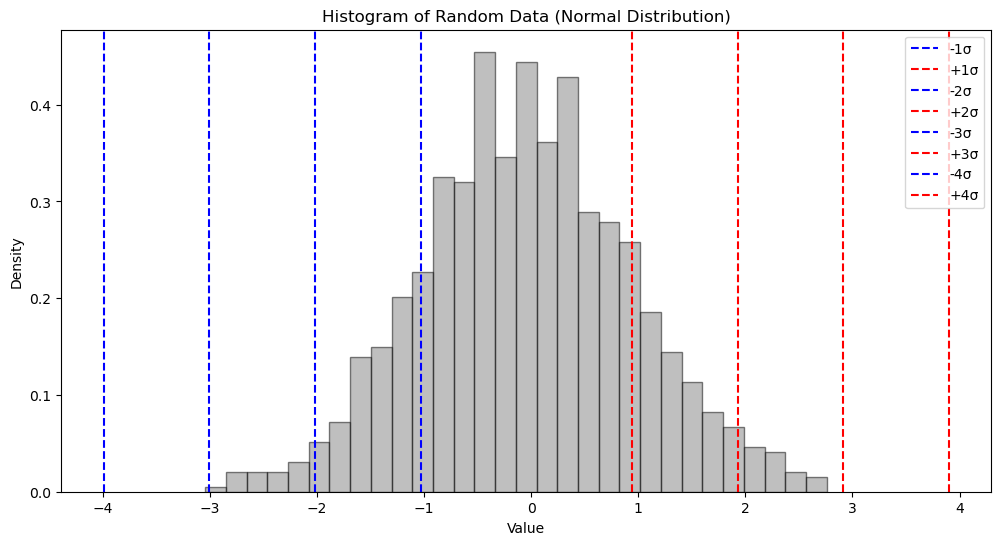

k         Empirical Probability    Chebyshev Bound     
1         0.6880                   1.0000              
2         0.9500                   0.2500              
3         0.9990                   0.1111              
4         1.0000                   0.0625              


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to demonstrate Chebyshev's Inequality
def chebyshev_inequality_demo():
    # Step 1: Generate a random dataset (normal distribution)
    np.random.seed(0)
    data = np.random.normal(loc=0, scale=1, size=1000)  # Mean = 0, Std Dev = 1

    # Step 2: Calculate mean and standard deviation
    mean = np.mean(data)
    std_dev = np.std(data)

    # Step 3: Define k values for demonstration
    k_values = [1, 2, 3, 4]

    # Step 4: Plot the histogram of the data
    plt.figure(figsize=(12, 6))
    plt.hist(data, bins=30, alpha=0.5, color='gray', edgecolor='black', density=True)
    plt.title('Histogram of Random Data (Normal Distribution)')
    plt.xlabel('Value')
    plt.ylabel('Density')

    # Step 5: Plot Chebyshev bounds
    for k in k_values:
        lower_bound = mean - k * std_dev
        upper_bound = mean + k * std_dev
        plt.axvline(lower_bound, color='blue', linestyle='--', label=f'-{k}σ')
        plt.axvline(upper_bound, color='red', linestyle='--', label=f'+{k}σ')

    plt.legend()
    plt.show()

    # Step 6: Calculate the probability and compare with Chebyshev's bound
    print(f"{'k':<10}{'Empirical Probability':<25}{'Chebyshev Bound':<20}")
    for k in k_values:
        lower_bound = mean - k * std_dev
        upper_bound = mean + k * std_dev

        # Empirical probability
        within_bounds = np.logical_and(data >= lower_bound, data <= upper_bound)
        empirical_prob = np.mean(within_bounds)

        # Chebyshev's bound
        chebyshev_bound = 1 / k**2

        # Print results
        print(f"{k:<10}{empirical_prob:<25.4f}{chebyshev_bound:<20.4f}")

# Call the function to demonstrate Chebyshev's Inequality
chebyshev_inequality_demo()




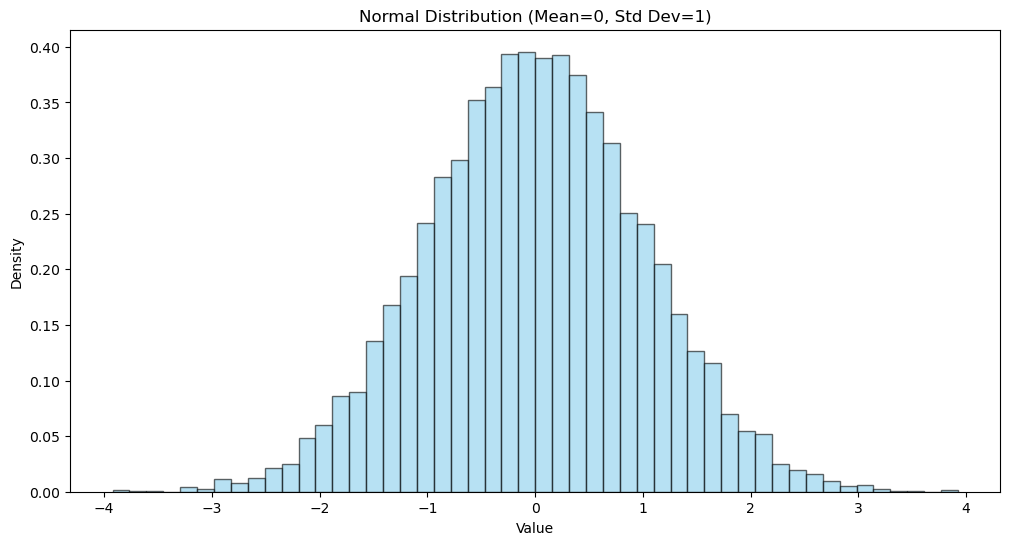

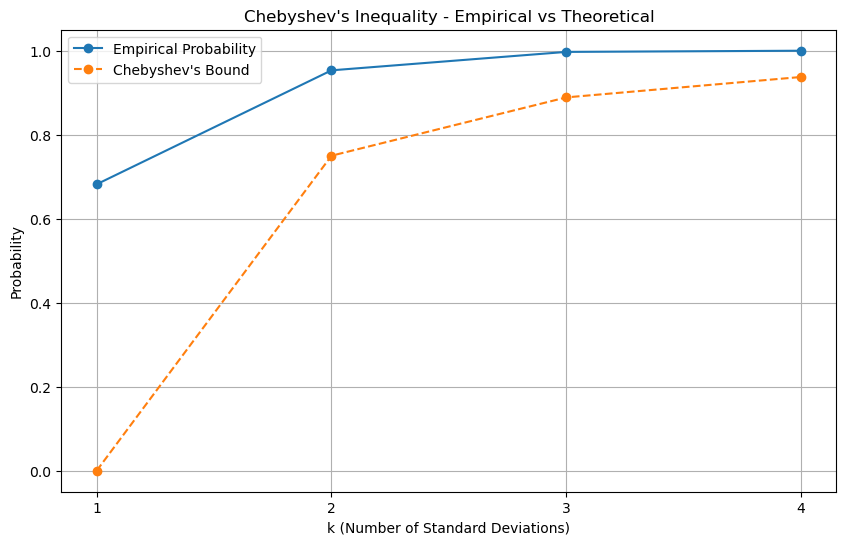

k     Empirical Probability     Chebyshev Bound     
1     0.6820                    0.0000              
2     0.9533                    0.7500              
3     0.9972                    0.8889              
4     1.0000                    0.9375              


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
np.random.seed(42)  # For reproducibility
n_samples = 10000  # Number of samples to generate
mu = 0  # Mean of the distribution
sigma = 1  # Standard deviation of the distribution

# Generate data
data = np.random.normal(mu, sigma, n_samples)

# Function to calculate the percentage of data within k standard deviations
def calculate_within_k_std(data, k, mu, sigma):
    return np.mean(np.abs(data - mu) < k * sigma)

# Values of k to test Chebyshev's inequality
k_values = [1, 2, 3, 4]

# Calculate the empirical probability and Chebyshev bound for each k
empirical_probs = [calculate_within_k_std(data, k, mu, sigma) for k in k_values]
chebyshev_bounds = [1 - (1 / k**2) for k in k_values]

# Plotting the normal distribution
plt.figure(figsize=(12, 6))
plt.hist(data, bins=50, density=True, alpha=0.6, color='skyblue', edgecolor='black')
plt.title('Normal Distribution (Mean=0, Std Dev=1)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

# Plotting empirical probability vs Chebyshev bound
plt.figure(figsize=(10, 6))
plt.plot(k_values, empirical_probs, marker='o', label='Empirical Probability')
plt.plot(k_values, chebyshev_bounds, marker='o', linestyle='--', label="Chebyshev's Bound")
plt.title("Chebyshev's Inequality - Empirical vs Theoretical")
plt.xlabel('k (Number of Standard Deviations)')
plt.ylabel('Probability')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

# Print results
print(f"{'k':<5} {'Empirical Probability':<25} {'Chebyshev Bound':<20}")
for k, emp, chev in zip(k_values, empirical_probs, chebyshev_bounds):
    print(f"{k:<5} {emp:<25.4f} {chev:<20.4f}")
